In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Color and Type Probability Charts

To start, let's bring in a few of the interesting datasets we saved from the previous workbook, and add them as variables. We will just look at color-given-typing and type-given-type, since these 2 give us an interesting view. Color given color, when plotted out, has way too much data and is not very readable.

**Note:** be sure to run the code in `co_occurrences_aggregate.ipynb` before this, so the data files are all created.

In [3]:
def read_file(path_to_json):
    with open(path_to_json, encoding = 'utf-8') as f:
        data = f.read()
        json_data = json.loads(data) 
    return json_data

color_given_typing_likelihoods = read_file('./data/probabilities/color_given_type_likelihood.json')
type_given_type_likelihoods = read_file('./data/probabilities/type_pair_likelihood.json')

We will save all these into DataFrames, which makes it a lot easier to add/remove certain data, and also use it for the charts.

In [4]:
# Reuseable function to mask for certain percentage ranges
def mask_percents(df, lower_limit = 0, upper_limit = 1):

    mask_start = df >= lower_limit
    df_masked = df[mask_start]

    mask_stop = df_masked <= upper_limit
    df_masked = df_masked[mask_stop]

    return df_masked

In [5]:
def normalize_amounts(df, normalize_to = 1, flatten = False):

    totals = df.sum()

    if (flatten):
        flattened_df = df.transform(lambda x: x / x )
        totals = flattened_df.sum()
        new_df = flattened_df.transform(lambda x: ( x * normalize_to ) / totals[x.name] )
    else:
        new_df = df.transform(lambda x: ( x * normalize_to ) / totals[x.name] )

    return new_df

In [6]:
# Saving dataframe for Color given Typing
df_cgt = pd.DataFrame(color_given_typing_likelihoods)

# saving dataframe for Type given Type
df_tgt = pd.DataFrame(type_given_type_likelihoods)

In [33]:
def plot_data(df, title, xlabel, ylabel, lower_limit = 0, upper_limit = 1, size=(18, 8), use_color = True, legend = False, color_palette=[], normalize = False, flatten = False, show_x = True, show_y = True):
    
    fig = plt.figure(figsize = size)

    df_masked = mask_percents(df, lower_limit, upper_limit)
    if (normalize):
        if (flatten):
            df_masked = normalize_amounts(df_masked, flatten=True)
        else:
            df_masked = normalize_amounts(df_masked)

    df_masked = df_masked.transpose()
    df_masked = df_masked.fillna(0) # fill the NaN values with 0, so they can be added to the y_offset

    y_offset = np.zeros(len(df_masked.index))

    for index, col in enumerate(df_masked.columns):
        if (use_color):
            if (len(color_palette) > 0):
                _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, color = color_palette[index], edgecolor = 'black', label = col)
            else:
                _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, color = col, edgecolor = 'black', label = col)
        else:
            _ = plt.bar(df_masked.index, df_masked[col], bottom = y_offset, edgecolor = 'black', label = col)
        y_offset = y_offset + df_masked[col]

    plot_title = f'{title} - {str(round(lower_limit * 100, 2))}% to {str(round(upper_limit * 100, 2))}%'
    plt.title(plot_title)

    if (show_y):
        plt.ylabel(f'{ylabel}', fontsize = 15)
    else:
        plt.yticks([])
    
    if (show_x):
        plt.xlabel(xlabel, fontsize = 15)
        plt.xticks(rotation = 45, fontsize = 12)
    else:
        plt.xticks([])

    if legend:
        plt.legend(bbox_to_anchor=(1.1,1.05),
          ncol=1, fancybox=True, shadow=True)
        

    return fig


Let's start by seeing how the type-given-type data looks when plotted out.

In [27]:
# Customizable variables for the Secondary Type Probabilities chart creation

# The range of probability values to mask between
range_between = (0, 1)

# Number of steps to do from lower limit of range up. This will determine the number of charts you get out.
steps = 4

# How much to increment lower limit for each step
increment = 0.05


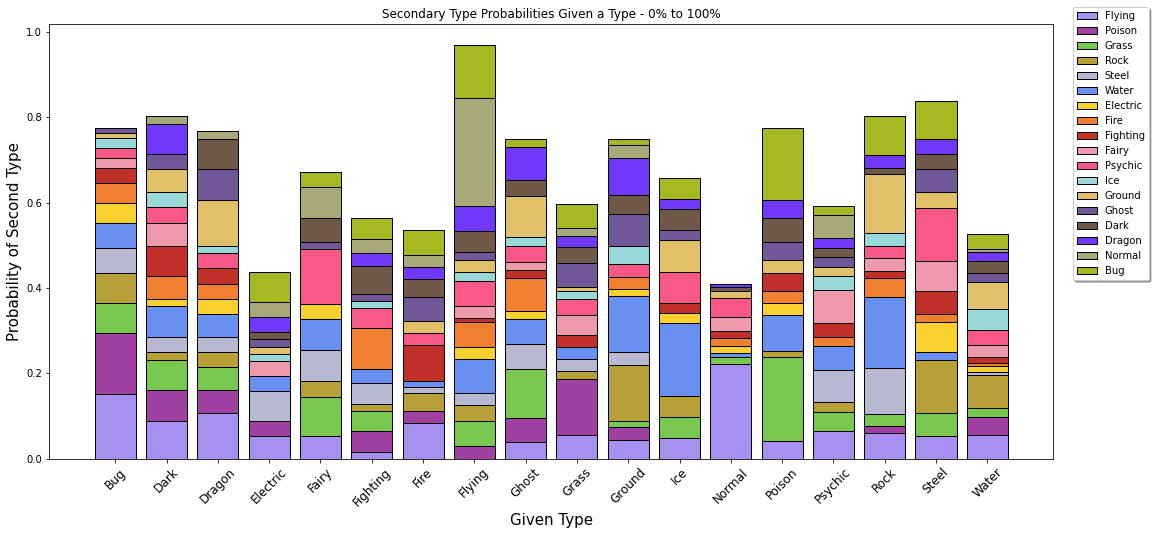

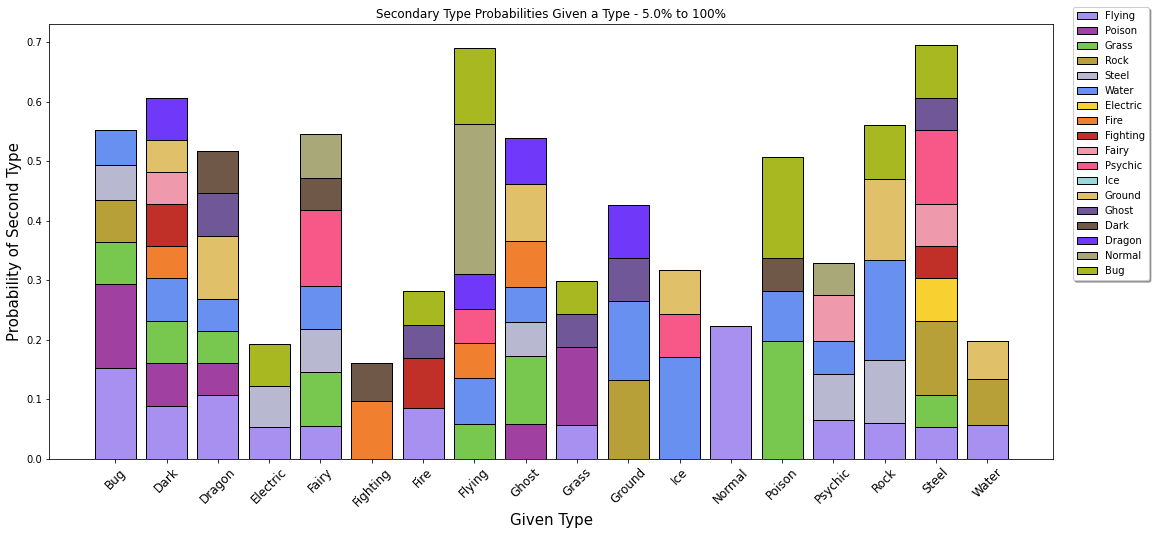

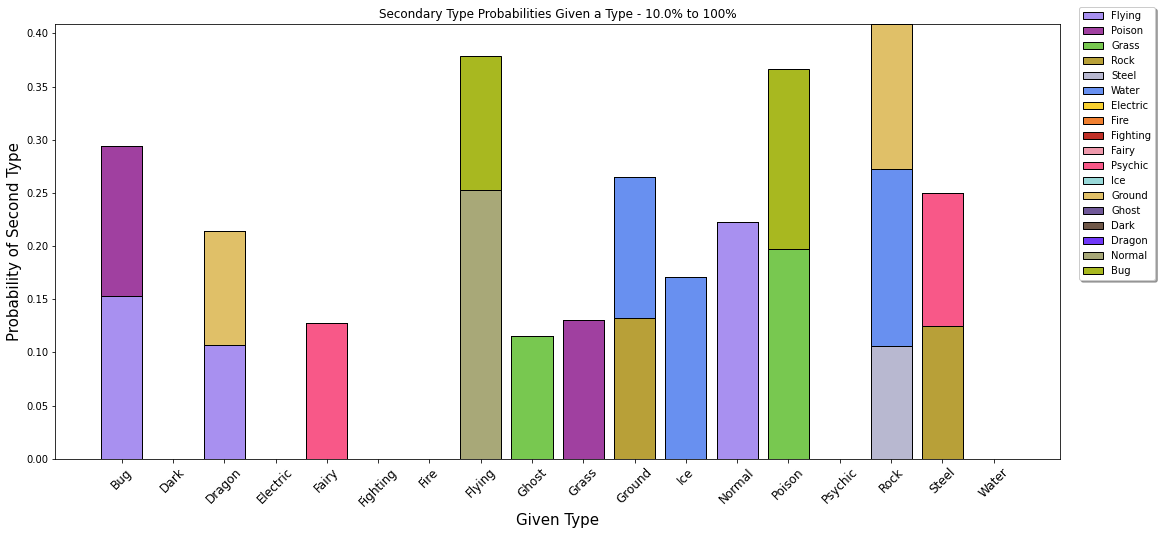

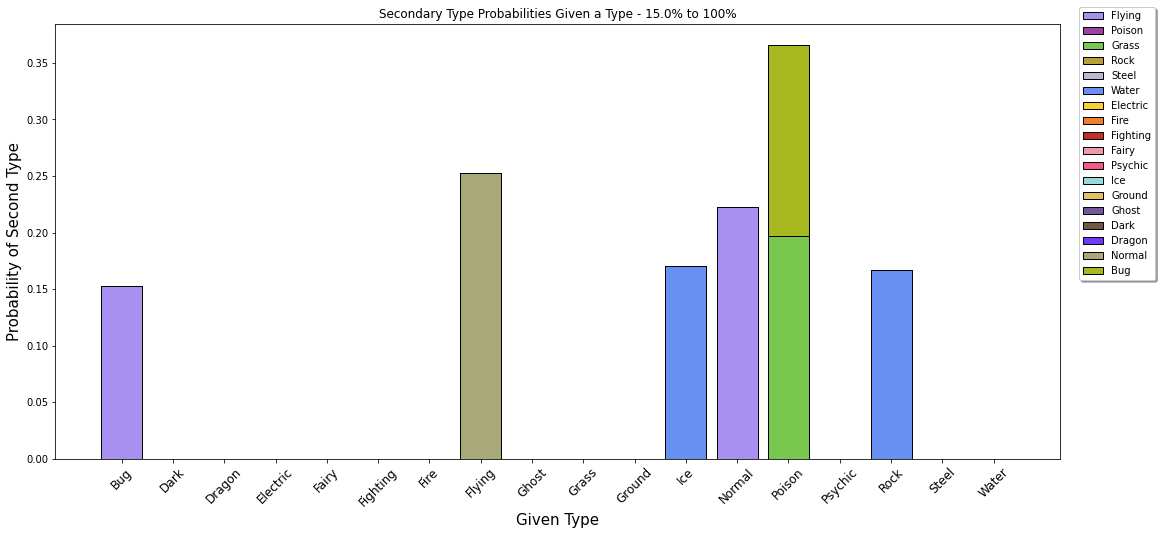

In [28]:
title = 'Secondary Type Probabilities Given a Type'
x_title = 'Given Type'
y_title = 'Probability of Second Type'

# Colors used in the stacks and key for each Type. Not recommended to touch this.
palette = ['#a890f0','#a040a0','#78c850','#b8a038','#b8b8d0','#6890f0','#f8d030','#f08030','#c03028','#ee99ac','#f85888','#98d8d8','#e0c068','#705898','#705848','#7038f8','#a8a878','#a8b820']

lower_limit = range_between[0]
upper_limit = range_between[1]
for i in range(steps):
    if (lower_limit > 1):
        break
    fig = plot_data(df_tgt, title, x_title, y_title, lower_limit,
                    upper_limit, legend=True, color_palette=palette)
    lower_limit += increment


# Extra figure if you want to play around with the customization a bit more. Just uncomment to run.
# fig_tgt = plot_data(df_tgt,  title, x_title, y_title, lower_limit=0.05, upper_limit=1, legend=True, color_palette=palette)



A more interesting probability chart to see is the probability that, given a type, it will be a certain color. We can plot this out in a stacked bar chart, to see the probabilities that a type will be a certain color. The resulting bar chart is basically a color palette for each type, which is pretty neat. It is probably the nicest because it lets you see the data without a key (since the stacked bars are just the colors themselves).

We can also use the masking from above to restrict to probabilities of 0.1 and up, 0.2 and up, etc, to see differing charts. From below, you can see that once it gets to 0.4 to 1, some types have no bars. This just means that the likelihoods for colors given those types is more equal (or there are more colors available for that type).

In [29]:
# Customizable variables for the Probability of Color given Type chart creation

# The range of probability values to mask between
range_between = (0, 1)

# Number of steps to do from lower limit of range up. This will determine the number of charts you get out.
steps = 4

# How much to increment lower limit for each step
increment = 0.10


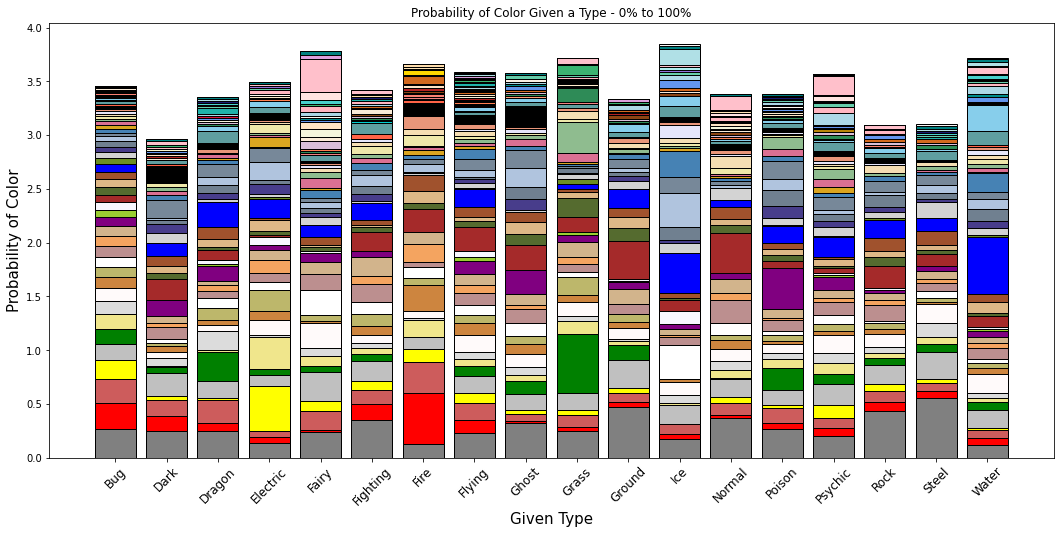

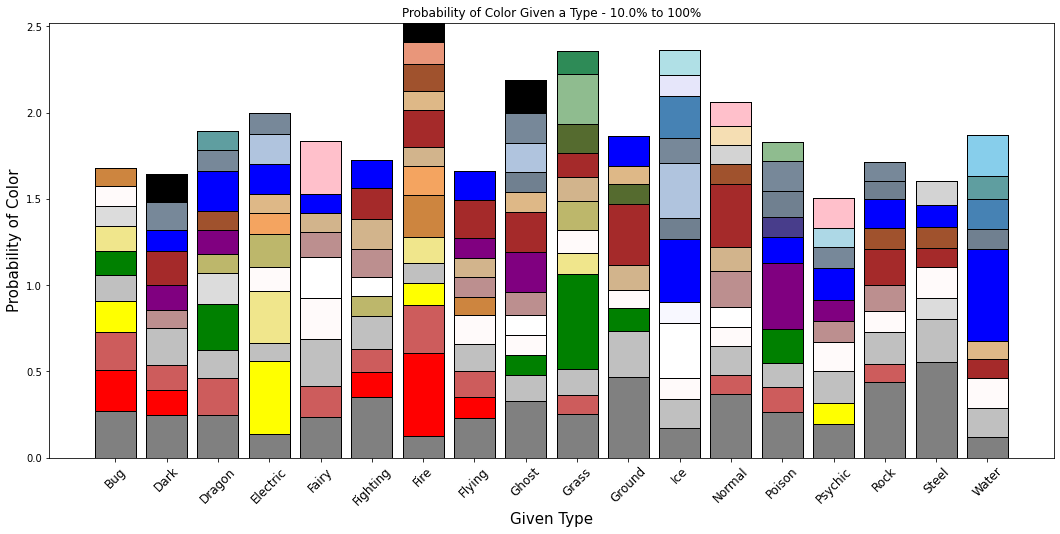

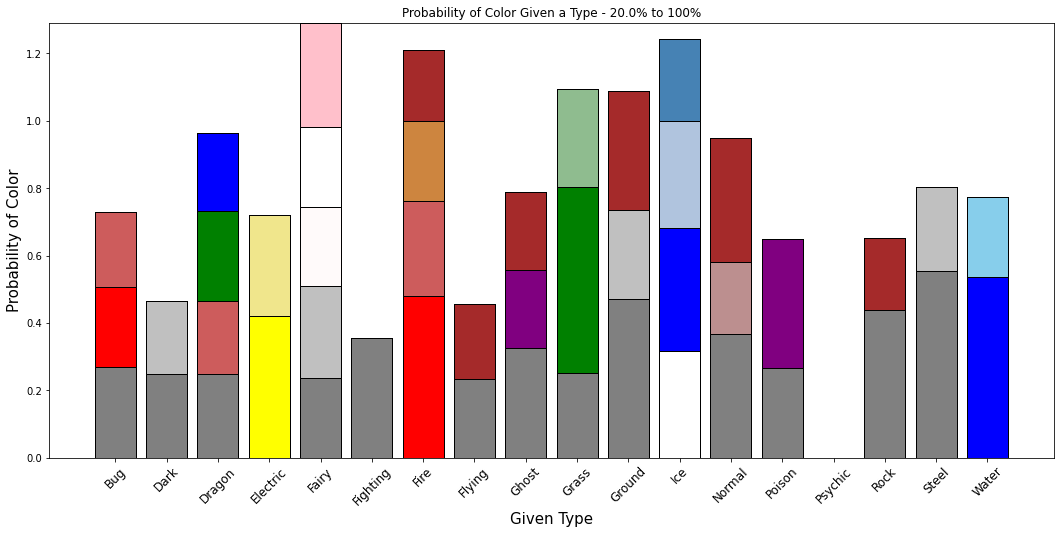

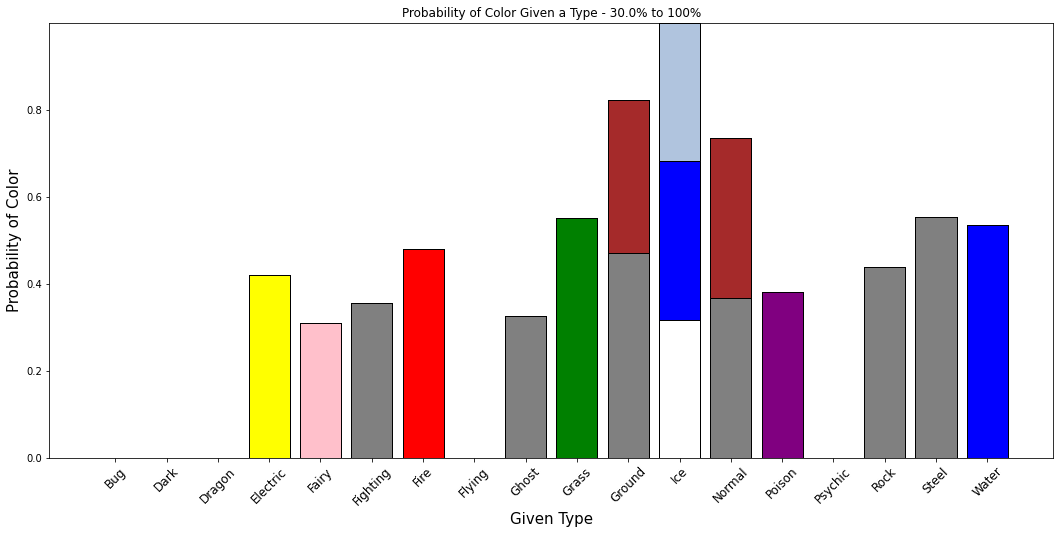

In [30]:
title = 'Probability of Color Given a Type'
x_title = 'Given Type'
y_title = 'Probability of Color'

lower_limit = range_between[0]
upper_limit = range_between[1]
for i in range(steps):
    if (lower_limit > 1):
        break
    fig = plot_data(df_cgt, title, x_title, y_title, lower_limit,
                    upper_limit, use_color=True)
    lower_limit += increment

# Custom chart if you want to play around with the data more. Just uncomment to have it run.
# fig_cgt = plot_data(df_cgt, title, x_title, y_title, lower_limit=0.10, upper_limit=1, size=(18, 12), use_color=True)


Using the color-given-type data, we can even flatten out the charts so that we get a literal color palette for each type.

In [35]:
# Customizable variables for the Color Paleete chart creation

# The range of probability values to mask between
range_between = (0, 1)

# Number of steps to do from lower limit of range up. This will determine the number of charts you get out.
steps = 4

# How much to increment lower limit for each step
increment = 0.05


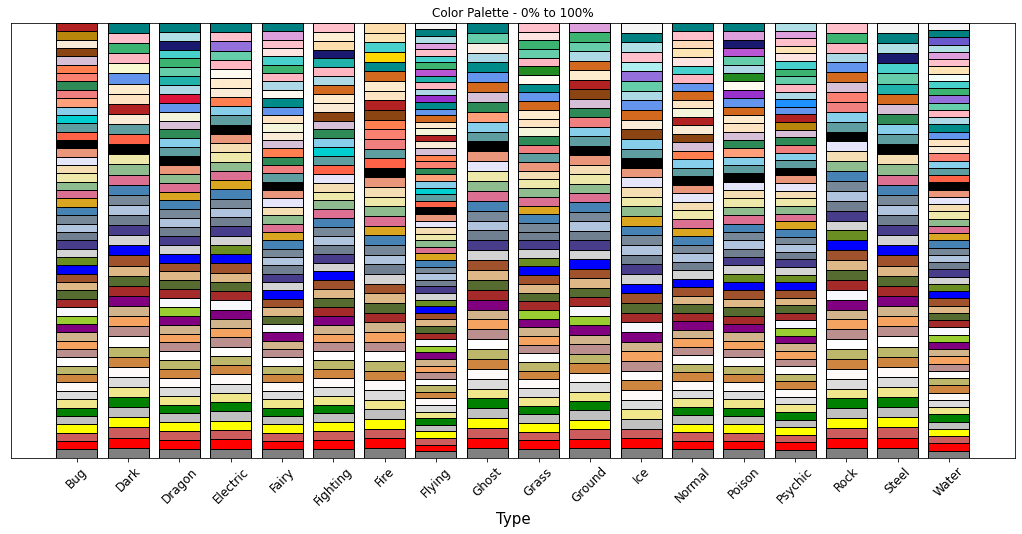

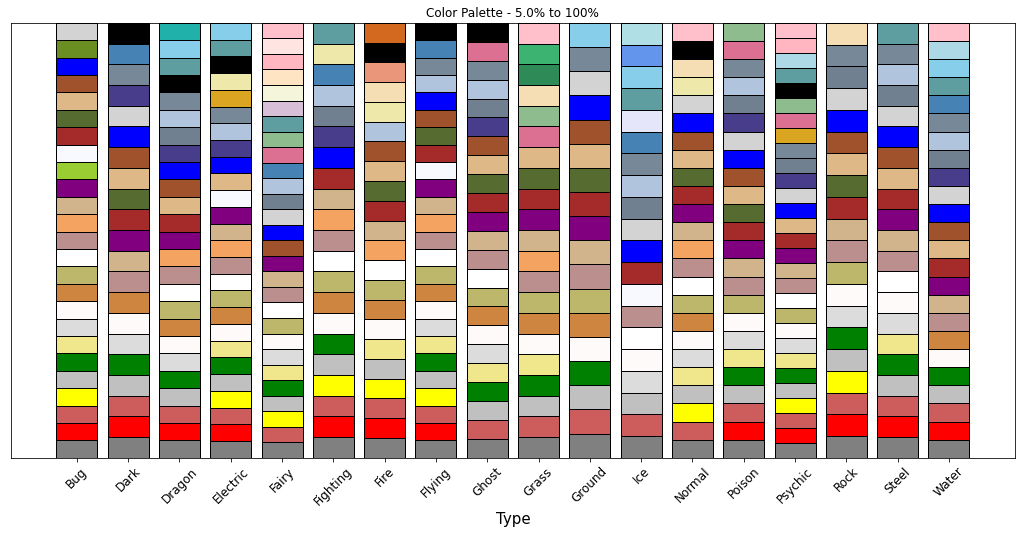

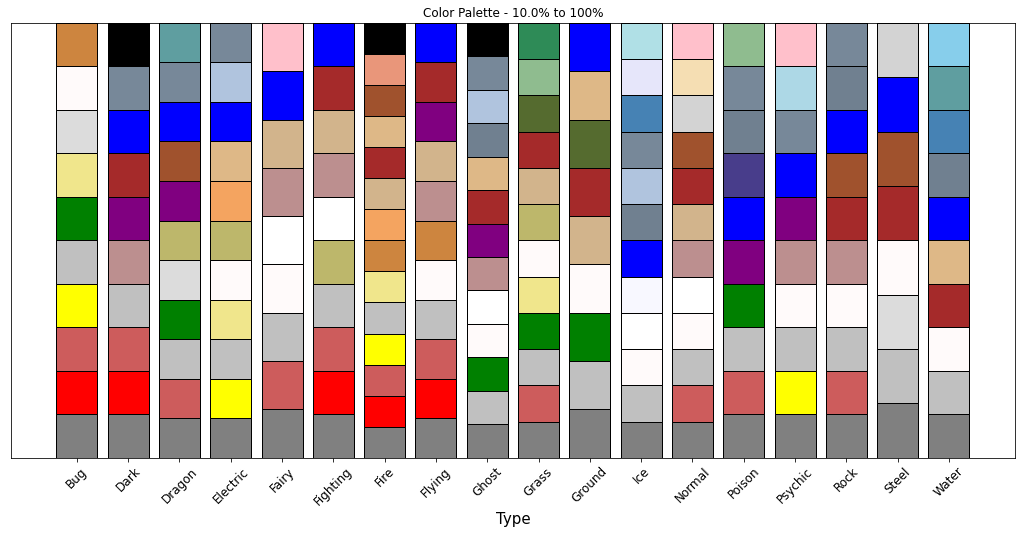

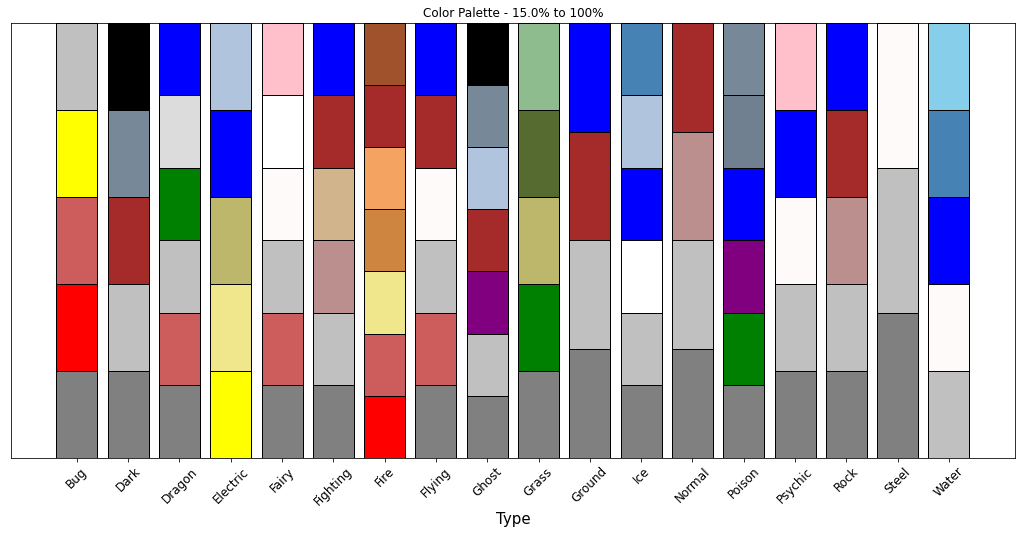

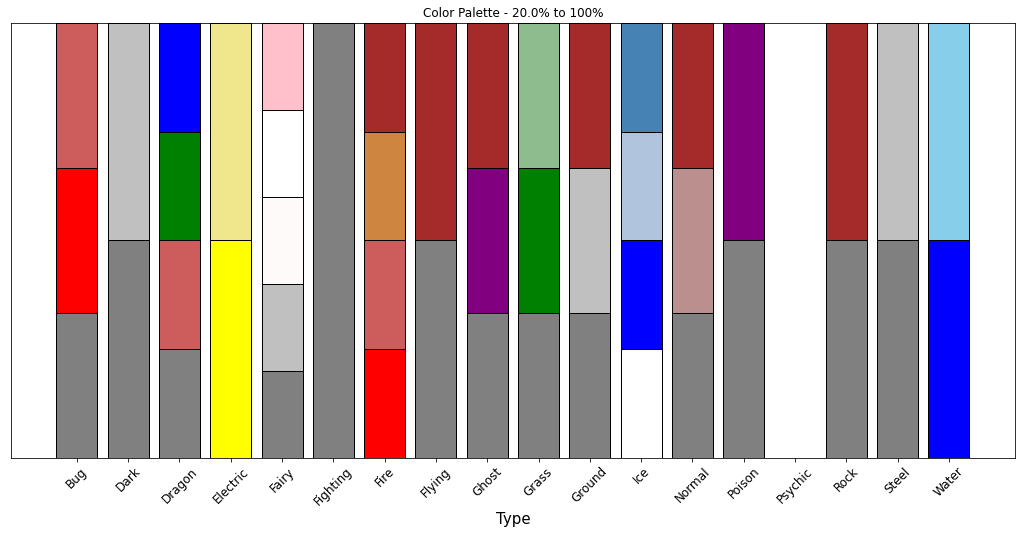

In [34]:
title = 'Color Palette'
x_title = 'Type'
y_title = ''

lower_limit = range_between[0]
upper_limit = range_between[1]
for i in range(steps):
    if (lower_limit > 1):
        break
    fig = plot_data(df_cgt, title, x_title, y_title, lower_limit, upper_limit, use_color=True, normalize=True, flatten=True, show_y=False)
    lower_limit += increment


# Extra figure to play around with and customize. Just uncomment to use.
# fig_cgt_palette = plot_data(df_cgt, title, x_title, y_title, 0.05, 1, use_color=True, normalize=True, flatten=True, show_y=False)
